# Intro

We want to split the train dataset into a training dataset and a validation dataset.

The training dataset should contain all the unique labels and not the records in the validation dataset.

In the validation dataset, we have images with labels that do exist in the training dataset.

# Setting Up

In [ ]:
# Generate a list of random indexes
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

# change the working directory
%cd /content/gdrive/MyDrive/Colab Notebooks/CPSC 4830/Final Exam/data

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/CPSC 4830/Final Exam/data


In [ ]:
train_translated = pd.read_csv('train_translated.csv')

In [ ]:
train_translated.drop(columns = "Unnamed: 0", inplace = True)
train_translated.head(2)

,posting_id,image,image_phash,title,label_group,title_translate
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,Victoria's Secret Paper Bag
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Double Tape 3M VHB 12 mm x 4.5 m ORIGINAL / DO...


# Examining Duplicates

In [ ]:
train_translated["label_group"].value_counts()

994676122     51
1163569239    51
1141798720    51
159351600     51
562358068     51
              ..
1349674444     2
2359590024     2
1528129430     2
3156068330     2
53836859       2
Name: label_group, Length: 11014, dtype: int64

There is a duplicate for every unique label.

In [ ]:
df_duplicated = train_translated[train_translated.duplicated(subset = ["label_group"], keep = 'first') == True]

In [ ]:
duplicated_index = list(df_duplicated.index)

In [ ]:
random.seed(1)
random_index = random.sample(duplicated_index, int(0.2*len(duplicated_index)))
len(random_index)

4647

In [ ]:
# duplicates?
len(set(random_index))

4647

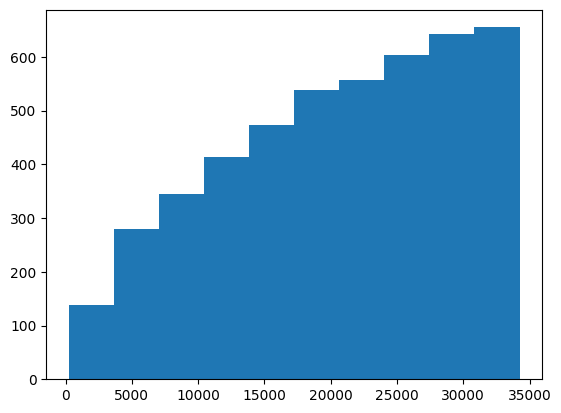

In [ ]:
plt.hist(random_index)
plt.show()

Since the first record of the unique label is not considered a duplicate, this graph makes sense. Most duplicates show up later in the dataset.

# Subsetting and Exporting

In [ ]:
train_final = train_translated.drop(random_index)
train_final

,posting_id,image,image_phash,title,label_group,title_translate
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,Victoria's Secret Paper Bag
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Double Tape 3M VHB 12 mm x 4.5 m ORIGINAL / DO...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,Maling TTS Canned Pork Luncheon Meat 397 gr
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,Short sleeve Batik negligee - Random / Mixed P...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,Nescafe \xc3\x89clair Latte 220ml
...,...,...,...,...,...,...
34244,train_945815402,fff1222750374ddbed82b17c8bd2766d.jpg,b0cbce308fcdcc64,Baterai Batre Battery Xiaomi Redmi Note 3 BM46...,3091541662,Battery Battery Xiaomi Redmi Note 3 BM46 BM-46...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,Washable 75 gsm Non-Woven Spunbond Fabric Mask...
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,Broth NON MSG HALAL Mama Kamu Free-range Chick...


In [ ]:
validation_final = train_translated.iloc[random_index,:]
validation_final

,posting_id,image,image_phash,title,label_group,title_translate
11443,train_1003554842,560a5c3577fb22be2ac82c0e97558158.jpg,f3c78fce8c3050f0,Mustika Ratu Minyak Cem-Ceman 175 ml,3044373336,Mustika Ratu Oil Cem-Ceman 175 ml
29516,train_523363809,dd1f14c7a734ff28b67062ae4f8529c6.jpg,af919a66c49d688b,Snobby Kelambu Box Bayi Snobby 1 Tiang KBX 1201,873493898,Snobby Baby Mosquito Net Snobby 1 Pole KBX 1201
6976,train_1036373061,34b4aa697f4606fcf52ec74f53c9f246.jpg,dc132bece40552db,stopper mini,578575602,mini stoppers
17316,train_3107279377,8255718baadd70981be5f49de9ff270b.jpg,e691986c9586cdec,Sepatu Wedges Selop Jelly F916/304,1376270839,F916/304 Jelly Slides Wedges Shoes
10476,train_2073151758,4e8d8a4d98f98dd41be729476d498701.jpg,f7b9c25c64433926,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Ikat Ramb...,994676122,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Korean St...
...,...,...,...,...,...,...
27798,train_470754832,d0079dc586643d945c77873704edbd4b.jpg,ab27d43951ce8cb1,Sweety Silver Pants BOYS GIRLS M30 L28 XL26 XX...,2808026978,Sweety Silver Pants BOYS GIRLS M30 L28 XL26 XX...
6914,train_1514837750,3432f7578e361963b686d67106773991.jpg,e1c69e90cb6d9632,Mayonnaise,2314234752,Mayonnaise
34156,train_3864746358,ff4e956153b56ce431a317f31c063391.jpg,bed6a058d3e0cd91,Fair N Pink Body Serum pemutih badan alami,1209949003,Fair N Pink Body Serum natural body whitening
14972,train_1724283836,70d2bc6d0fc97505e1a71a1587b4e6e9.jpg,e72796d849643731,Kuas masker Grosir,1623932098,Wholesale mask brushes


In [ ]:
validation_final.to_csv("validation_final.csv")
train_final.to_csv("train_final.csv")

# Treating the Images

In [ ]:
image = pd.read_csv("shopee_images.csv")

In [ ]:
images_train = image.drop(random_index)
images_train.head()

,label_group,image,0,1,2,3,4,5,6,7,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,249114794,0000a68812bc7e98c42888dfb1c07da0.jpg,143,73,83,150,85,95,153,88,...,142,194,116,134,191,111,129,193,122,143
1,2937985045,00039780dfc94d01db8676fe789ecd05.jpg,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2395904891,000a190fdd715a2a36faed16e2c65df7.jpg,206,201,195,205,200,194,206,201,...,245,242,243,245,244,245,247,244,245,247
3,4093212188,00117e4fc239b1b641ff08340b429633.jpg,254,254,254,254,254,254,254,254,...,248,251,250,249,251,251,249,252,251,250
4,3648931069,00136d1cf4edede0203f32f05f660588.jpg,255,255,255,255,255,255,255,255,...,141,22,72,141,22,72,141,22,72,141


In [ ]:
images_validation = image.iloc[random_index,:]
images_validation.head()

,label_group,image,0,1,2,3,4,5,6,7,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
11443,3044373336,560a5c3577fb22be2ac82c0e97558158.jpg,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
29516,873493898,dd1f14c7a734ff28b67062ae4f8529c6.jpg,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6976,578575602,34b4aa697f4606fcf52ec74f53c9f246.jpg,12,14,13,12,14,13,28,30,...,18,9,9,9,9,9,9,11,11,11
17316,1376270839,8255718baadd70981be5f49de9ff270b.jpg,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10476,994676122,4e8d8a4d98f98dd41be729476d498701.jpg,249,247,246,251,249,248,253,251,...,173,184,179,173,184,180,174,178,173,169


In [ ]:
# Exporting
images_train.to_csv("images_train.csv")
images_validation.to_csv("images_validation.csv")

# Check by Index

In [ ]:
check2 = []
for i in random_index:
  if images_validation['label_group'][i] != validation_final['label_group'][i]:
    check2.append(i)
check2

[]